# LSTM Exploration

Notebook for figuring out how to run an LSTM model

In [1]:
import torch
from torch import nn
from torch import optim
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine
import os
import pandas as pd
# from dotenv import load_dotenv
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Sentdex PyTorch Tutorial
[Sentdex's Pytorch series](https://www.youtube.com/watch?v=BzcBsTou0C0). This is more of an intro to Pytorch than LSTM, but that's fine for now.

### Video 1

In [28]:
# Tensors are just numpy arrays
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])
print(x*y)

tensor([10.,  3.])


Torch is similar to numpy!

In [29]:
x = torch.zeros([2,5])
print(x)
print(x.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])


In [15]:
y = torch.rand([2,5]) 
y

tensor([[0.2675, 0.2013, 0.9053, 0.1067, 0.1656],
        [0.1622, 0.8483, 0.8833, 0.4758, 0.7938]])

In [17]:
# Reshape equivalent
y.view([1,10])

tensor([[0.2675, 0.2013, 0.9053, 0.1067, 0.1656, 0.1622, 0.8483, 0.8833, 0.4758,
         0.7938]])

### Video 2

In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST("", train=True, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

In [4]:
# best batch size is typically between 8 and 64 (bigger batch sizes train faster)
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle = True)

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
X, y = data[0][0], data[1][0] #[1][0] is the y value 
y

tensor(4)

In [7]:
print(X.shape)

torch.Size([1, 28, 28])


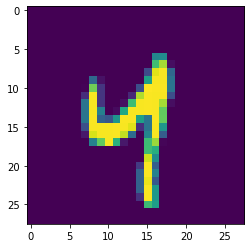

In [8]:
import matplotlib.pyplot as plt  # pip install matplotlib

# Reshape into 28 * 28 image 
plt.imshow(data[0][0].view(28,28))
plt.show()

In [9]:
data[0][0][0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [10]:
data[0][0][0][3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [11]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


### Video 3 - Building the NN

In [12]:
# Relatively interchangeable. NN is object oriented. Functional is, well, functional
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Fully connected layer 1, 784 = 28*28
        # 64 output dimension
        self.fc1 = nn.Linear(784, 64) 
        self.fc2 = nn.Linear(64, 64) 
        self.fc3 = nn.Linear(64, 64) 
        self.fc4 = nn.Linear(64, 10) # ten classes 
        
    def forward(self, x):
        # defines how the data flows through our network
        
        # Run RELU activation function across the entire layer (keeps outputs from exploding)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        # Do not fun RELU on the output layer 
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1) # softmax is for multiclass, dim=1 specifies that you apply softmax across the output tensor 
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [14]:
X = torch.rand((28,28))
X = X.view(-1, 28*28) #-1 specifies that the data will be an unknown shape. (1,28*28) would work too

In [15]:
output= net(X)
output

tensor([[-2.1887, -2.3954, -2.3262, -2.2918, -2.1752, -2.3876, -2.4088, -2.3453,
         -2.2136, -2.3271]], grad_fn=<LogSoftmaxBackward0>)

### Video 4 - Training the model
...continued from prior video

In [16]:
import torch.optim as optim

# net.parameters() means that we optimize every parameter 
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS=3 # number of passes through our dataset

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X,y = data
        # zero grad helps deal with accumulating gradients. More info here: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch
        net.zero_grad() 
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward() # back propogation! 
        optimizer.step() # performs back propr
        
    print(loss)

tensor(0.1069, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)


In [17]:
correct = 0
total = 0

# Torch no grad means we don't calculate anything here. 
with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1 
            total +=1 
print(f"Accuracy: {round(correct/total, 3)}")

Accuracy: 0.977


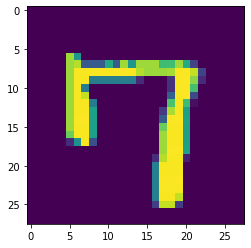

In [18]:
import matplotlib.pyplot as plt 
plt.imshow(X[4].view(28,28))
plt.show()

In [19]:
print(torch.argmax(net(X[4].view(-1, 784))[0]))

tensor(7)


### Video 5 -- Covnet Intro

### Video 6 -- Training Convnet

### Video 7 -- Using the GPU

Make sure you install openssl and/or ssh 

In [20]:
# check for cuda
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print('on GPU')
else: 
    device = torch.device('cpu')
    print('on CPU')

on CPU


In [21]:
torch.cuda.device_count()

0

In [23]:
# Putting the net onto the GPU
net.to(device) # OR
net = Net().to(device)

Additional instructions for getting the data for this example can be found [here](https://pythonprogramming.net/gpu-deep-learning-neural-network-pytorch/)

In [ ]:
# Code from convnet videos that I've not read fully 
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

REBUILD_DATA = False # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)


class Net(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 5) # input is 1 image, 32 output channels, 5x5 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 5) # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 2) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1)


net = Net()
print(net)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1  # lets reserve 10% of our data for validation
val_size = int(len(X)*VAL_PCT)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]


In [26]:
EPOCHS = 3

def train(net):
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    BATCH_SIZE = 100
    EPOCHS = 3
    for epoch in range(EPOCHS):
        for i in range(0, len(train_X), BATCH_SIZE): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
            #print(f"{i}:{i+BATCH_SIZE}")
            batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
            batch_y = train_y[i:i+BATCH_SIZE]

            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            net.zero_grad()

            optimizer.zero_grad()   # zero the gradient buffers
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()    # Does the update

        print(f"Epoch: {epoch}. Loss: {loss}")

train(net)

NameError: name 'tqdm' is not defined

In [28]:
test_X.to(device)
test_y.to(device)

def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_X[i].view(-1, 1, 50, 50).to(device))[0]  # returns a list, 
            predicted_class = torch.argmax(net_out)

            if predicted_class == real_class:
                correct += 1
            total += 1

    print("Accuracy: ", round(correct/total, 3))

test(net)

NameError: name 'test_X' is not defined

### Video 8 - Model Analysis

In [29]:
def fwd_pass(X, y, train=False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs, y)
    
    if train:
        loss.backward()
        optimizer.step()
    return acc, loss

In [ ]:
def test(size=32):
    random_start = np.random.randint(len(test_X)-size)
    X, y = text_X[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1, 1, 50, 50).to(device), y.to(device))
    return val_acc, val_loss

val_acc, val_loss = test(size-32)
print(val_acc, val_loss)

In [ ]:
import time

MODEL_NAME = f"model-{int(time.time())}"

net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSEloss()

def train():
    BATCH_SIZE = 100
    EPOCHS = 1
    with open('model.log', "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
                batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50).to(device)
                batch_y = train_y[i:i+BATCH_SIZE].to(device)
                
                acc. loss = fwd_pass(batch_X, batch_y, train=True)
                for i % 50 == 0:
                    val_acc, val_loss = test(size=100)
                    f.write(f"{MODEL_NAME}, {round(time.time(), 3)}, {round(float(acc),2)}, {round(float(loss, 4))}, {round(float(val_acc),2)}, {round(float(val_loss, 4))} \n")
train()

In [ ]:
# Can be done just fine with pandas 
def create_acc_loss_graph(model_name):
    contents = open('model.log', 'r').read().split('\n')
    times = []
    accuracies = []
    losses = []
    val_accs = []
    val_losses = []
    for c in contents:
        if model_name in c:
            name, timestamp, acc, loss, val_acc, val_loss = c.split(',')
            
            time.append(float(timestamp))
            accuracies.append(float(acc))
            losses.append(float(loss))
            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))
    fig = plt.figure()
    ax1 = plt.subplot2grid((2,1), (0,0))
    ax1 = plt.subplot2grid((2,1), (1,0), sharex=ax1)
    
    ax1.plot(times, accuracies, label='acc')
    ax1.plot(times, val_accs, label='val_acc')
    ax1.legend(loc=2)
    
    # just repeat above for losses 
    ax2.plot()
    